# **Исследование объявлений о продаже квартир**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости. Задача — установить параметры для построения автоматизированной системы: она отслеживает аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.

# **Шаг 1. Открытие файла с данными и изучение общей информации:**

### **1. Загружаем данные из файла в датафрейм и выводим на экран:**

In [47]:
import pandas as pd                                                                               # подключаем библиотеку Pandas
import numpy as np                                                                                # подключаем библиотеку NumPy
data = pd.read_csv("C:\py\Проект исследовательский анализ данных/real_estate_data.csv", sep="\t") # загружаем данные из файла в датафрейм
print(data)                                                                                       # выводим данные на экран

       total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70 

### **2. Изучаем общую информацию о полученном датафрейме:**

In [48]:
data.info() # изучаем общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [49]:
data.head(10) # выводим первые десять строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### **3. Строим общую гистограмму для всех числовых столбцов таблицы:**

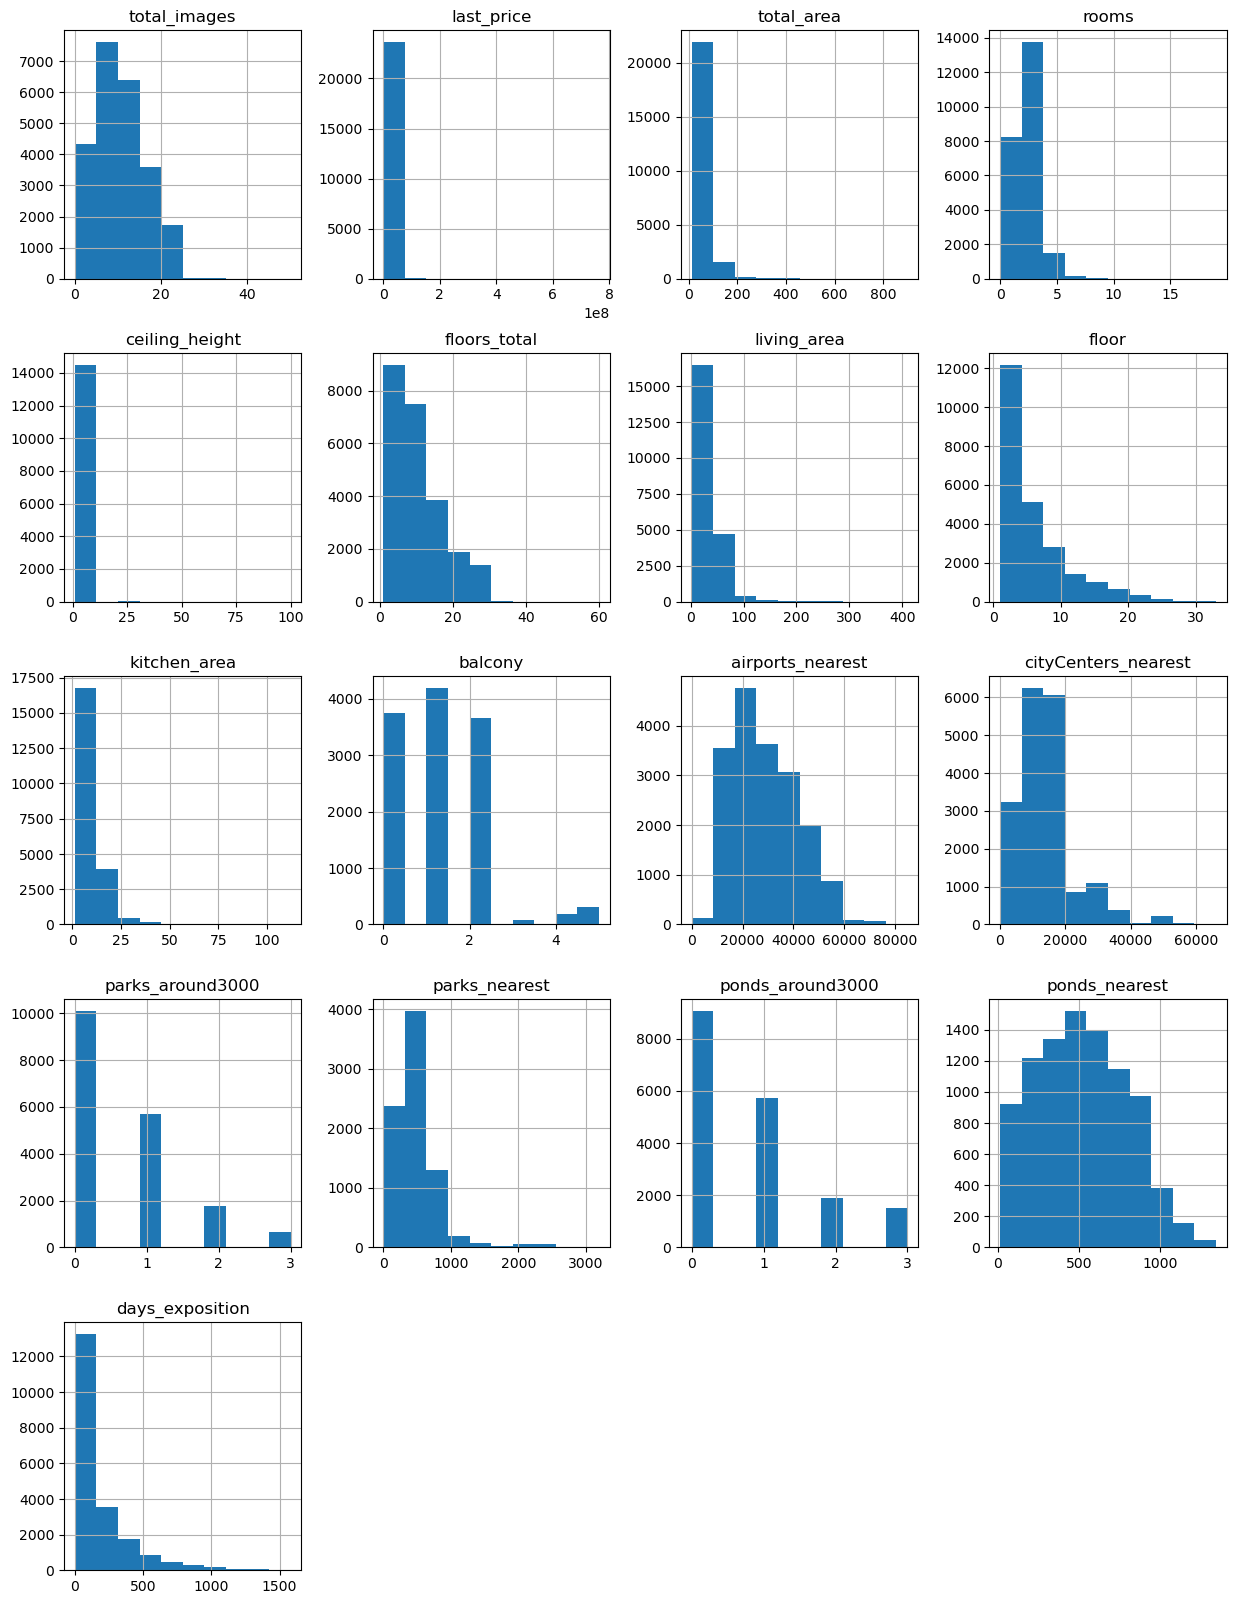

In [50]:
import matplotlib.pyplot as plt # импортируем модуль для вывода графиков 
data.hist(figsize=(15, 20))     # создаём гистограмму
plt.show()                      # выводим на экран

In [51]:
 data.duplicated().sum() # проверим данные на наличие явных дубликатов

0

# **Шаг 2. Предобработка данных**


### **1. Найдём и изучим пропущенные значения в столбцах:**
- Определим, в каких столбцах есть пропуски методом **isna()** и посчитаем их методом **sum()**:

In [52]:
data.isna().sum() # определим пропуски и сосчитаем их

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

- В данном датасете обнаружены пропуски в следующих столбцах:
1. **'ceiling_height'** (высота потолков) - **9195** пустых значений, потому что данные не указаны;
2. **'floors_total'** (всего этажей в доме) - **86** пустых значений, либо данные не указали, либо дом одноэтажный;
3. **'living_area'**(жилая площадь) - **1903** пустых значений, данные не указали;
4. **'is_apartment'**(апартаменты) - **20924** пустых значений, скорее всего это не апартаменты;
5. **'kitchen_area'**(площадь кухни) - **2278** пустых значений, данные не указали; 
6. **'balcony'**(число балконов) - **11519** пропущенных значений, либо данные не указали , либо нет балконов;
7. **'locality_name'**(название населенного пункта) - **49** пропущенных значений, данные не указали; 
8. **'airports_nearest'**(расстояние до ближайшего аэропорта) - **5542** пропущенных значений, аэропортов рядом нет;
9. **'cityCenters_nearest'**(расстояние до центра города) - **5519** пропущенных значений, центр города не близко;
10. **'parks_around3000'**(число парков в радиусе 3 км) - **5518** пропущенных значений, парков нет в радиусе 3км;
11. **'parks_nearest'**(расстояние до ближайшего парка) - **15620** пропущенных значений, парков рядом нет;
12. **'ponds_around3000'**(число водоёмов в радиусе 3 км) - **5518** пропущенных значений, водоёмов нет в радиусе 3км; 
13. **'ponds_nearest'**(расстояние до ближайшего водоёма) - **14589** пропущенных значений, скорее всего водоёмов рядом нет; 
14. **'days_exposition'**(сколько дней было размещено объявление) - **3181** пропущенных значений, объявление не было опубликовано.

- Заполним пропущенные значения там, где это возможно. Например, если продавец не указал число балконов **'balcony'**, то, скорее всего, в его квартире их нет. Такие пропуски заменим на 0. Если логичную замену предложить невозможно, то эти значения  оставим пустыми. Пропуски — тоже важный сигнал, который нужно учитывать. То же самое сделаем для столбцов числа парков в радиусе 3 км **'parks_around3000'** и водоёмов в радиусе 3 км **'ponds_around3000'** :

In [53]:
for column in ['balcony', 'parks_around3000', 'ponds_around3000']: # создадим цикл с перебором пустых элементов и заменим их на 0
    data[column] = data[column].fillna(0)                          # метод fillna() ищет пустые значения и заменяет на указанное значение

- В столбце **'locality_name'** тоже присутствуют пустые значения, а без названия населённого пункта вся строка становится неактуальной, поэтому удалим эти строки методом **dropna()**:

In [54]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

- Убедимся, что в данных столбцах не осталось пропусков. Ещё раз посчитаем и выведем пропущенные значения датафрейма:

In [55]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

### 2. Выведим и рассмотрим типы данных в каждом столбце методом **info()**:

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- Найдём столбцы, в которых нужно изменить тип данных это: 
 **'last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition'** столбцы содержат данные, которые можно посчитать,  используя целые числа. 
  **'first_day_exposition'** этот столбец содержит дату и время, но время в нулевом значении, поэтому для удобства лучше изменить формат без отображения времени.

In [57]:
data['days_exposition'] = data['days_exposition'].round()               # применим метом округления в данном столбце, без округления выдаёт ошибку

data['last_price'] = data['last_price'].astype(int)                     # изменим тип данных с помощью метода astype()

for column in ['floors_total','balcony', 
               'airports_nearest', 'cityCenters_nearest', 
               'parks_around3000', 'parks_nearest', 'ponds_around3000', 
               'ponds_nearest', 'days_exposition']:
    data[column] = data[column].astype('Int64')                        # изменим тип данных с помощью метода astype()
    
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')          # изменим формат даты и временни

- Убедимся, что в данных столбцах изменился тип и формат данных. Ещё раз выведем общую информацию и первые 10 строк датафрейма:

In [58]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,<NA>
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,11.00,2,посёлок Шушары,12817,18603,0,<NA>,0,<NA>,81
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,9.10,0,городской посёлок Янино-1,<NA>,<NA>,0,<NA>,0,<NA>,55
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,14.40,1,посёлок Парголово,52996,19143,0,<NA>,0,<NA>,155
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,18.90,2,Санкт-Петербург,23982,11634,0,<NA>,0,<NA>,<NA>
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,8.81,0,посёлок Мурино,<NA>,<NA>,0,<NA>,0,<NA>,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,6.50,2,Санкт-Петербург,50898,15008,0,<NA>,0,<NA>,289


### 3. Выведим и изучим уникальные значения :

- найдём уникальные значения с помощью метода **unique()** в столбце **'locality_name'**, для удобства отсортируем методом **sort_values()** и сосчитаем с помощью **len()** :

In [59]:
print(data['locality_name'].sort_values().unique())                                           # отсортируем уникальные значения
print ('Количество уникальных занчений: ', len(data['locality_name'].sort_values().unique())) # выведим и сосчитаем уникальные значения

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

- Заменим названия в столбце **'locality_name'** с помощью метода **replace()**. Для этого заменим **'поселок'** на **'посёлок'**, затем **'городской посёлок'** на **'посёлок городского типа'** :

In [60]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')                           
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа') 

- Убедимся, что названия изменились, для этого ещё раз выведем уникальные значения в столбце **'locality_name'**, для удобства так же отсортируем и посчитаем их количество:

In [61]:
print(data['locality_name'].sort_values().unique())                                           # отсортируем уникальные значения
print ('Количество уникальных занчений: ', len(data['locality_name'].sort_values().unique())) # выведим и сосчитаем уникальные значения

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня Извар

### 4. Поиск редких и выбивающихся значений:

- Возьмём столбец **'ceiling_height'** и посмотрим на распределение высоты потолков во всем датафрейме:

<AxesSubplot:>

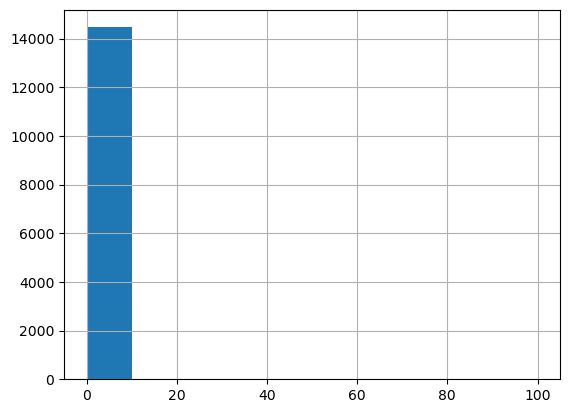

In [62]:
data['ceiling_height'].hist(range=(0,100))# построим гистограмму

In [63]:
data['ceiling_height'].describe() # выведем описательную статистику по столбцу

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

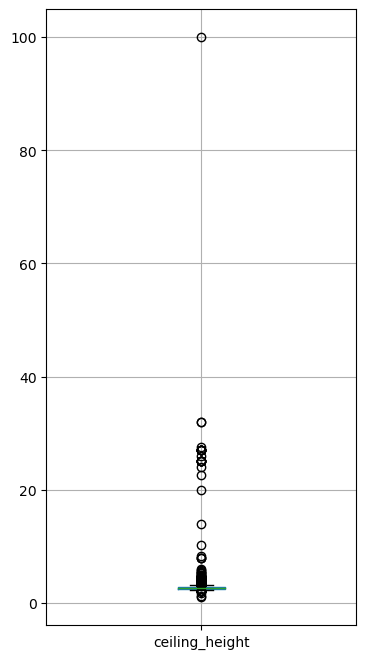

In [64]:
data.boxplot(column='ceiling_height', figsize=(4,8)) # построим диаграмму размаха 

- Как видно, что в основном потолки имеют высоту примерно до 5м, что вполне предсказуемо. Для определения выбивающихся значений и их количества построим гистрограмму по потолкам с высотой более 5 м. и потолкам с высотой менее 2 м.:

<AxesSubplot:>

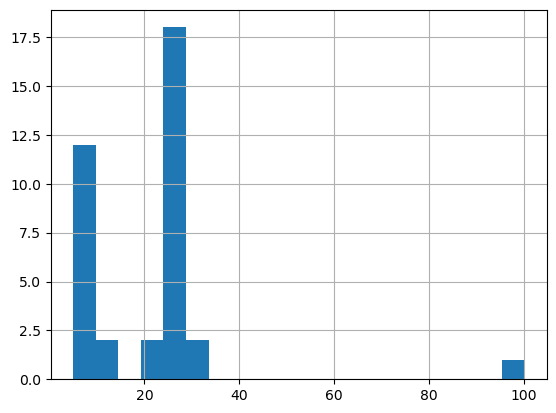

In [65]:
data['ceiling_height'].hist(range=(5,100), bins=20) # построение гистограммы

<AxesSubplot:>

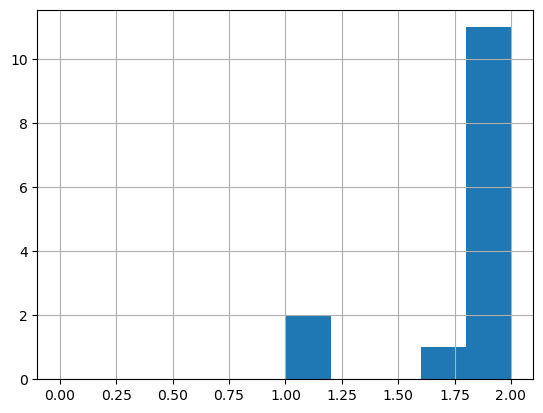

In [66]:
data['ceiling_height'].hist(range=(0,2), bins=10) # построение гистограммы

- По первому графику видно, что имеется объект недвижимости, где потолок 100 м. Так же имеются объекты недвижимости с высотой от 5 до 10 м, такая высота потолков может быть. А потолки с высотой более 10 м не бывают. Большое кол-во объектов с высокими потолками в диапазоне от 25 до 35 м позволяет предположить, что это объекты с типичной высотой потолка от 2,5 до 3,5 м, скорее всего здесь ошибка с разделителем. Поэтому, для получения корректных значений их нужно поделить на 10.
Также имеются недвижимости с высотой потолков менее 1,8 м, что такого не может быть. 
Поэтому для объектов с высотой потолков до 1.8 м, так же для объектов с потолками от 10 до 15 м и объекта с высотой 100 м заменим значения на NaN:

In [67]:
data.loc[data['ceiling_height'] == 100, 'ceiling_height'] = np.nan                                                      # ищем значения равные 100 заменяем на NaN
data.loc[(data['ceiling_height'] >= 10) & (data['ceiling_height'] <= 15), 'ceiling_height'] = np.nan                    # все значения больше 10 и меньше 15 заменяем на NaN
data.loc[data['ceiling_height'] <= 1.8 , 'ceiling_height'] = np.nan                                                     # все значения меньше 1.8 м заменяем на NaN
data.loc[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 35), 'ceiling_height'] = data['ceiling_height']/10 # все значения больше 20 и меньше 35 делим на 10

Посмотрим на результат:

In [68]:
print(data.loc[data['ceiling_height'] > 10, 'ceiling_height']) # убедимся, что возвращаемый список будет пустой

Series([], Name: ceiling_height, dtype: float64)


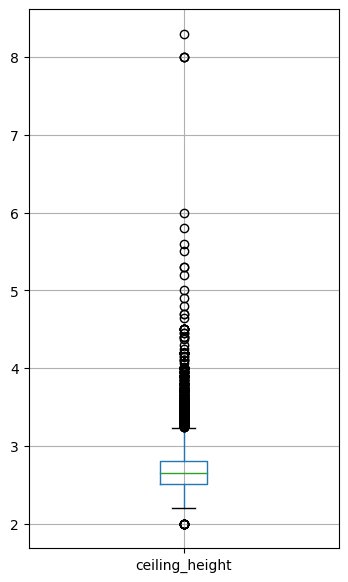

In [69]:
data.boxplot(column='ceiling_height', figsize=(4,7)) # построим диаграмму размаха 
plt.show()                                           # выведем на экран

<AxesSubplot:>

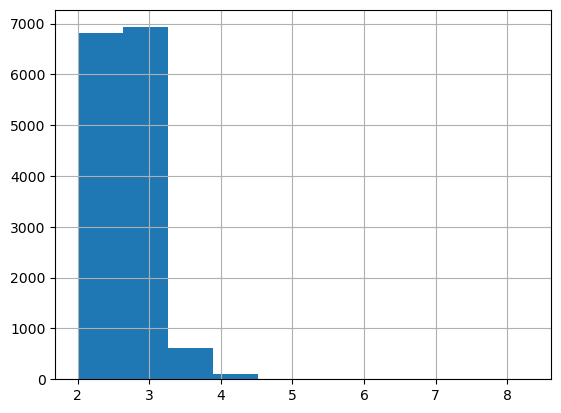

In [70]:
data['ceiling_height'].hist() # построим гистограмму

In [71]:
data['ceiling_height'].describe() # выведем описательную статистику по столбцу

count    14484.000000
mean         2.727845
std          0.292285
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

- Возьмём столбец **'last_price'** и посмотрим на распределение цен во всем датафрейме:

In [72]:
data['last_price'].describe() # выведем описательную статистику по столбцу

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [73]:
data['last_price'] = data['last_price'] / 1000 # отбросим три нуля

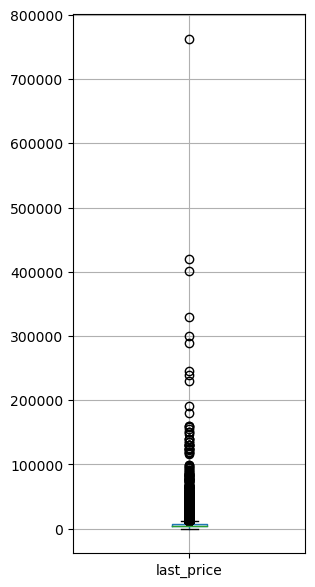

count     23650.000000
mean       6541.126898
std       10896.399175
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6799.000000
max      763000.000000
Name: last_price, dtype: float64

In [74]:
data.boxplot(column='last_price', figsize=(3,7)) # построим диаграмму размаха 
plt.show()
data['last_price'].describe()                    # выведем описательную статистику по столбцу

In [75]:
data = data.loc[(data['last_price'] > 400) & (data['last_price'] < 100000)]         # удаление выбросов
data.reset_index(inplace=True, drop=True)                                           # переназначение индексов
print(data['last_price'].describe())                                                # выведем описательную статистику по столбцу

count    23612.000000
mean      6250.747428
std       6427.824082
min        430.000000
25%       3400.000000
50%       4630.000000
75%       6750.000000
max      99000.000000
Name: last_price, dtype: float64


# Шаг 3. Добавление в таблицу новых столбцов со следующими параметрами:

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (перевести из м в км и округлить до целых значений).

In [76]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(1)   # добавим цену одного квадратного метра

data['publication_day_of_the_week'] = data['first_day_exposition'].dt.weekday         # добавим день недели публикации объявления 

data['month_of_publication'] = data['first_day_exposition'].dt.month                  # добавим месяц публикации объявления

data['year_of_publication'] = data['first_day_exposition'].dt.year                    # добавим год публикации объявления


data['type_of_apartment_floor'] = data.apply(                                         # добавим тип этажа квартиры
    lambda x: 'первый' if (x.floor == 1) 
    else ('последний' if (x.floor == x.floors_total) & isinstance(x.floors_total,int) # (значения — «первый», «последний», «другой»)
    else 'другой'), axis=1
)                                                                                     # с помощью строчной функции


data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)            # добавим расстояние до центра города в километрах 
try:
    data['cityCenters_nearest_km'] =  data['cityCenters_nearest_km'].astype('Int16')  # (переводим из м в км)
    print('cityCenters_nearest_km ok')
except:
    print('cityCenters_nearest_km Int32 type conversion fail')

cityCenters_nearest_km ok


In [77]:
data # выведим таблицу для проверки 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,publication_day_of_the_week,month_of_publication,year_of_publication,type_of_apartment_floor,cityCenters_nearest_km
0,20,13000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,482,2,755,<NA>,120.4,3,3,2019,другой,16
1,7,3350.0,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,...,<NA>,0,<NA>,81,82.9,1,12,2018,первый,19
2,10,5196.0,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,...,90,2,574,558,92.8,3,8,2015,другой,14
3,0,64900.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,84,3,234,424,408.2,4,7,2015,другой,7
4,2,10000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,112,1,48,121,100.0,1,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23607,9,9700.0,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,...,796,3,381,<NA>,72.5,1,3,2017,другой,4
23608,14,3100.0,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,...,<NA>,0,<NA>,45,52.5,0,1,2018,другой,<NA>
23609,18,2500.0,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,...,<NA>,0,<NA>,<NA>,44.1,6,2,2018,первый,<NA>
23610,13,11475.0,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,...,173,3,196,602,149.5,1,3,2017,другой,10


# Шаг 4. Проведение исследовательского анализа данных:

### 1. Изучим следующие параметры объектов и построим отдельные гистограммы для каждого из этих параметров. Опишем наблюдения по параметрам:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

In [78]:
# выведем описательную статистику по столбцам
data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 
      'floor', 'type_of_apartment_floor', 'floors_total', 'cityCenters_nearest', 
      'airports_nearest', 'parks_nearest', 'publication_day_of_the_week', 'month_of_publication']].describe() 

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,publication_day_of_the_week,month_of_publication
count,23612.000000,21719.000000,21349.000000,23612.000000,23612.000000,14458.000000,23612.000000,23527.000000,18102.000000,18079.000000,8037.000000,23612.000000,23612.000000
mean,59.905484,34.241807,10.522526,6250.747428,2.065179,2.726128,5.893148,10.681260,14217.940338,28807.553460,491.114222,2.568567,6.402507
std,33.474015,21.181298,5.739719,6427.824082,1.069811,0.287959,4.883226,6.596322,8603.568028,12648.259578,342.907907,1.788864,3.491846
min,12.000000,2.000000,1.300000,430.000000,0.000000,2.000000,1.000000,1.000000,181.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,18.600000,7.000000,3400.000000,1.000000,2.510000,2.000000,5.000000,9284.500000,18557.000000,288.000000,1.000000,3.000000
50%,52.000000,30.000000,9.100000,4630.000000,2.000000,2.650000,4.000000,9.000000,13117.000000,26764.000000,455.000000,3.000000,6.000000
75%,69.500000,42.200000,12.000000,6750.000000,3.000000,2.800000,8.000000,16.000000,16296.000000,37313.000000,612.000000,4.000000,10.000000
max,590.000000,409.000000,107.000000,99000.000000,19.000000,8.300000,33.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


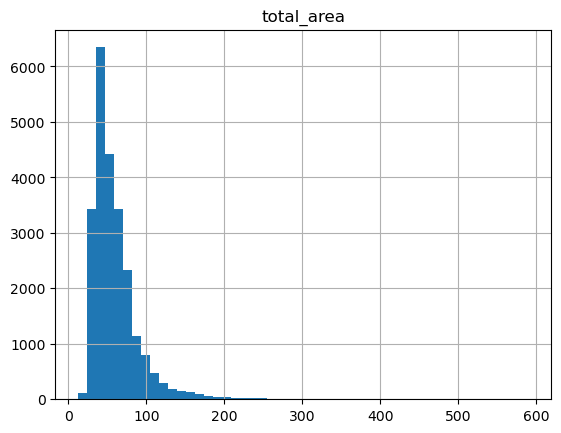

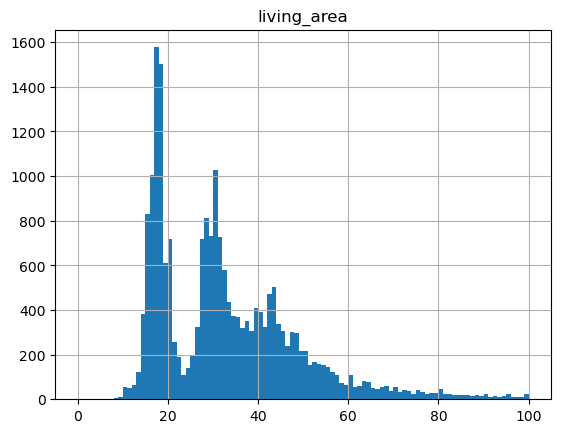

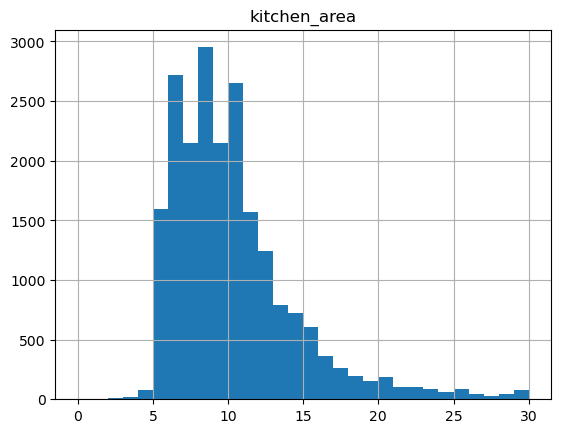

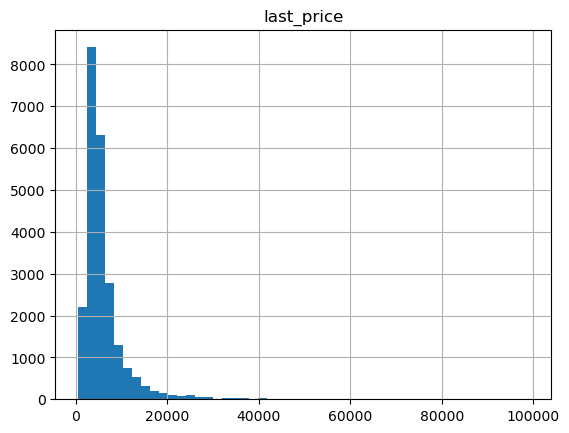

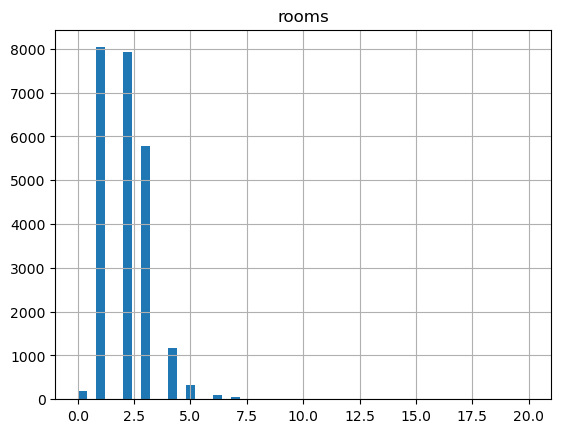

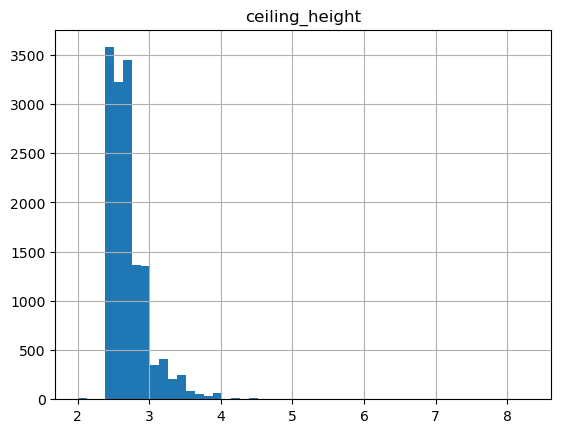

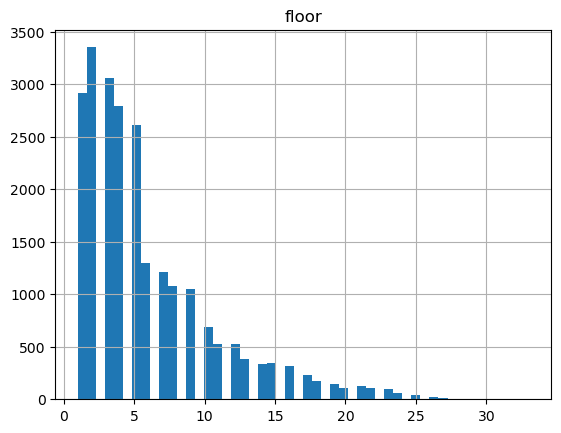

array([[<AxesSubplot:title={'center':'month_of_publication'}>]],
      dtype=object)

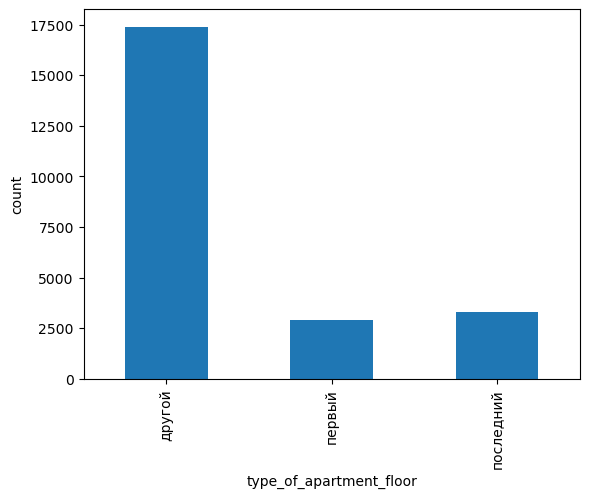

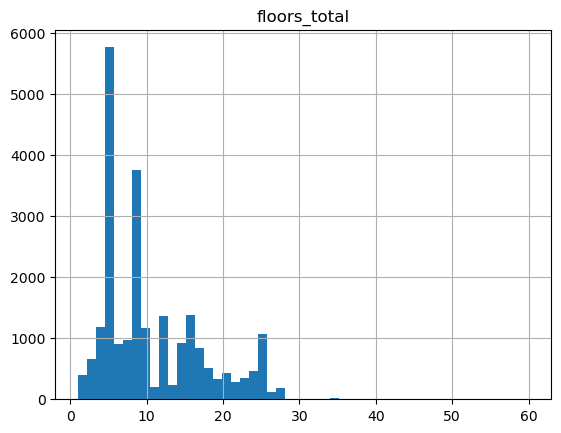

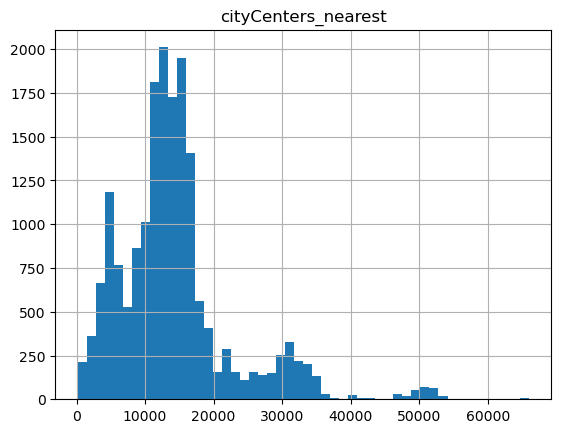

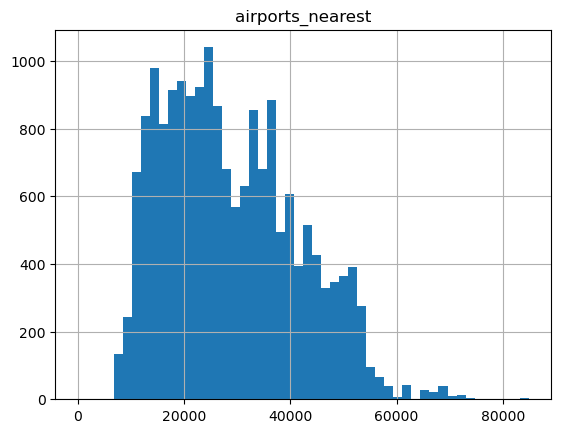

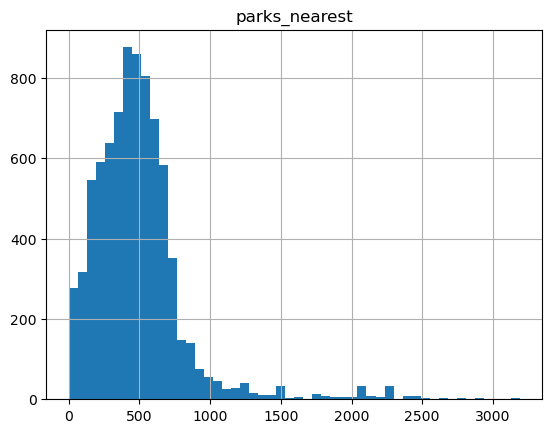

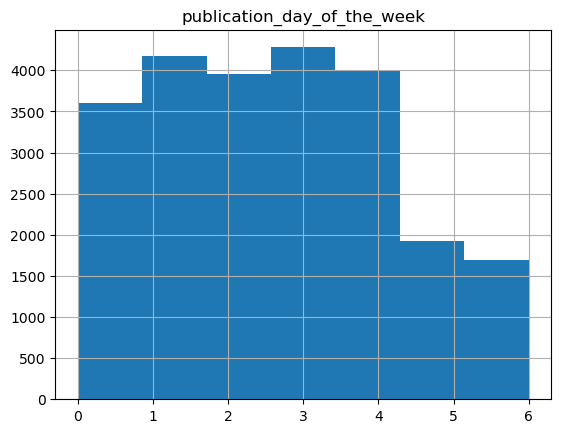

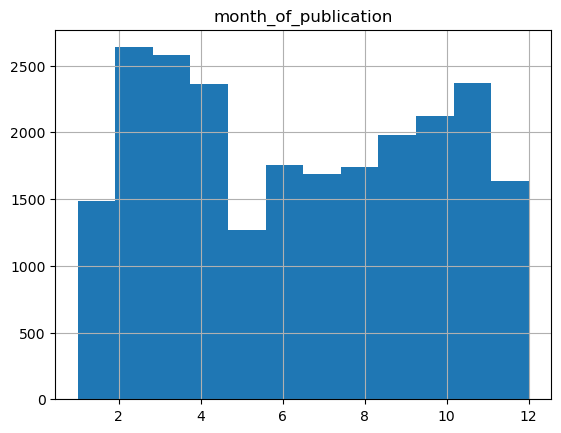

In [79]:
# выводим гистограммы по всем столбцам

data.hist('total_area', bins=50)  
data.hist('living_area', bins=100, range=(0,100))
data.hist('kitchen_area', bins=30, range=(0,30))
data.hist('last_price', bins=50)
data.hist('rooms', bins=50, range=(0,20))
data.hist('ceiling_height', bins=50)
data.hist('floor', bins=50)
plt.show()
data.groupby(by='type_of_apartment_floor')['type_of_apartment_floor'].count().plot(kind='bar', ylabel = 'count')
data.hist('floors_total', bins=50)
data.hist('cityCenters_nearest', bins=50)
data.hist('airports_nearest', bins=50)
data.hist('parks_nearest', bins=50)
data.hist('publication_day_of_the_week', bins=7)
data.hist('month_of_publication', bins=12)

**Опишем наблюдения по параметрам**:
- общая площадь: наибольшее количество жилья с площадью от 50 до 100 кв.м., имеются квартиры с площадью более 200 кв.м., но их мало, скорее всего это элитное жильё ;
- жилая площадь: самые наибольшие площади это 17 кв.м. и 30 кв.м., но имеется провал в 23-24 кв.м.;
- площадь кухни: самые распространённые площади от 5 до 12;
- цена объекта: самое дорогое жильё 80 млн., самое распространённое жильё от 10 млн. до 15 млн.;
- количество комнат: больше всего недвижимости 1-3 комнатные, но имеется даже и 33 комнатные;
- высота потолков: самая распространённая высота потолков от 2,5 до 3 метра;
- этаж квартиры: больше всего недвижимости с 1 по 5 этаж;
- тип этажа квартиры («первый», «последний», «другой»): больше всего квартир типа;
- общее количество этажей в доме: большее количество домов это 5 и 9 этажки;
- расстояние до центра города в метрах: самое большое количество недвижимости находится от 10 до 15 км. от центра;
- расстояние до ближайшего аэропорта: ;
- расстояние до ближайшего парка: больше всего недвижимости рядом с парками на расстоянии от 300-700 м.;
- день публикации объявления: самое большое количество объявлений публикуется среди недели, провал в воскресенье,т.к. выходной день;
- месяц публикации объявления: самое большое количество объявлений публикуется с февраля по май и с августа по октябрь .

### 2. Изучим, как быстро продавались квартиры по столбцу **'days_exposition'**: 

Среднее время продажи квартиры в днях: 180
Медианное время продажи квартиры в днях: 95


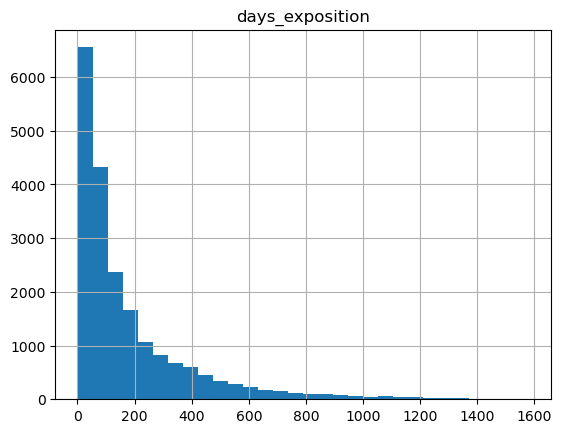

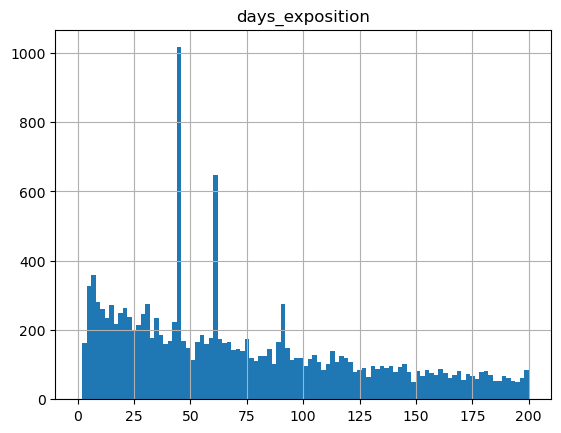

In [80]:
data.hist('days_exposition', bins=30)                                                   # построим гистограмму
data.hist('days_exposition', bins=100, range = (0,200))                                 # построим гистограмму
print(f'Среднее время продажи квартиры в днях:',int(data['days_exposition'].mean()))    # посчитаем среднее
print('Медианное время продажи квартиры в днях:',int(data['days_exposition'].median())) # посчитаем медиану

In [81]:
print('Количество объявлений(выбросы), которые сняты через:')
print('45 дней:',data[data['days_exposition']==45]['days_exposition'].count())
print('60 дней:',data[data['days_exposition']==60]['days_exposition'].count())
print('90 дней:',data[data['days_exposition']==90]['days_exposition'].count())

Количество объявлений(выбросы), которые сняты через:
45 дней: 878
60 дней: 538
90 дней: 203


- Скорее всего эти выбросы связанны с особенностями работы сайта/программы (например, окончание срока действия премиум аккаунта), которые автоматически снимает с публикации определённые объявления.
- Основная часть продаж приходится на первый месяц публикации,это можно считать быстрыми продажами. 
- А с третьего месяца и далее тенденция практически  линейная, за редким исключением это можно считать самыми долгими продажами. 


### 3. Факторы, которые больше всего влияют на общую (полную) стоимость объекта. Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

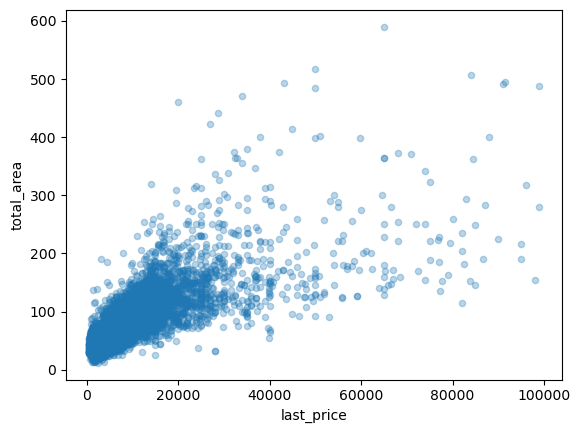

Корреляция цены от общей площади:  0.7692442604174171


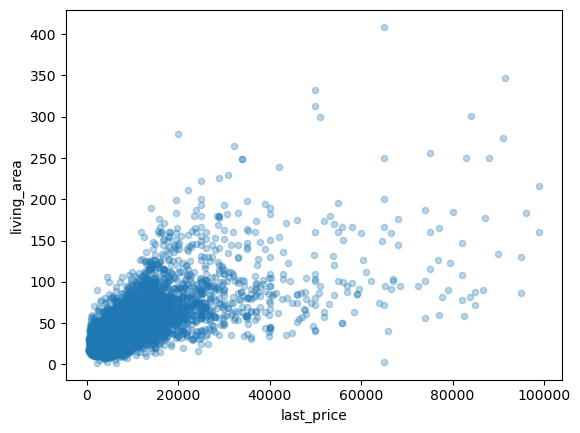

Корреляция цены от жилой площади:  0.6833796111875464


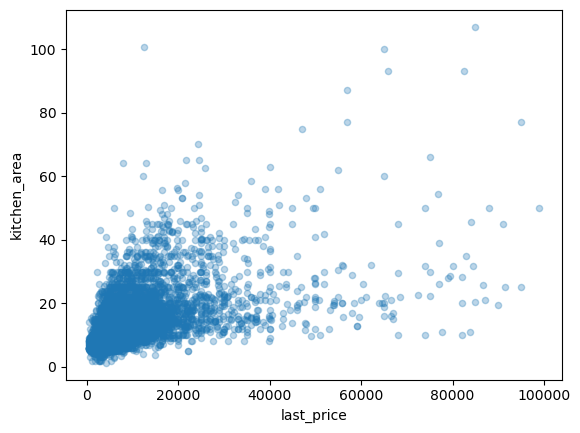

Корреляция цены от площади кухни:  0.5932978528821158


In [82]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)
plt.show()
print('Корреляция цены от общей площади: ', data['last_price'].corr(data['total_area']))

data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)
plt.show()
print('Корреляция цены от жилой площади: ', data['last_price'].corr(data['living_area']))

data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)
plt.show()
print('Корреляция цены от площади кухни: ', data['last_price'].corr(data['kitchen_area']))

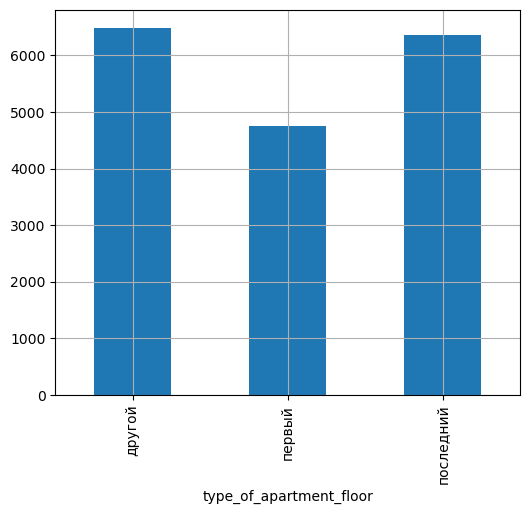

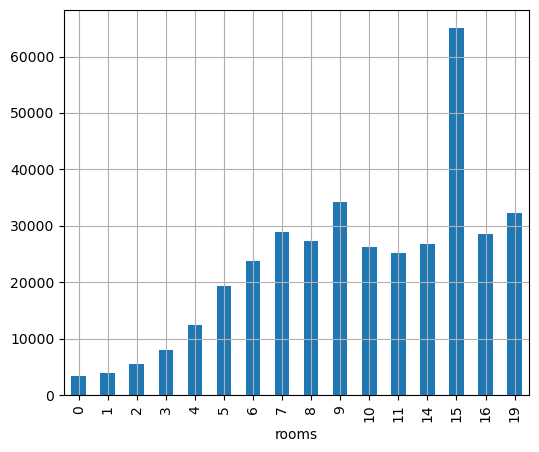

Корреляция цены от количества комнат:  0.47257134946832846


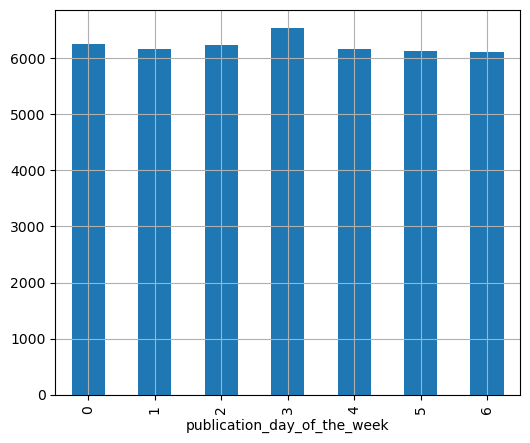

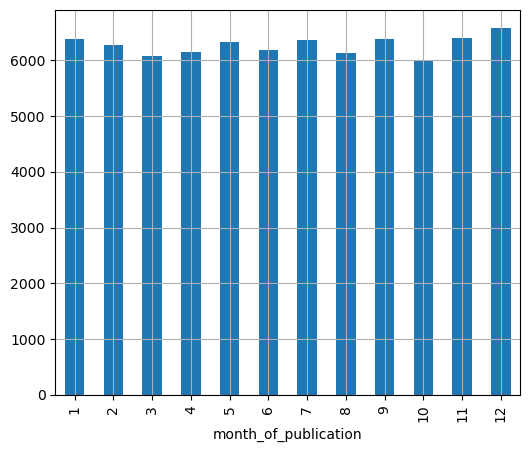

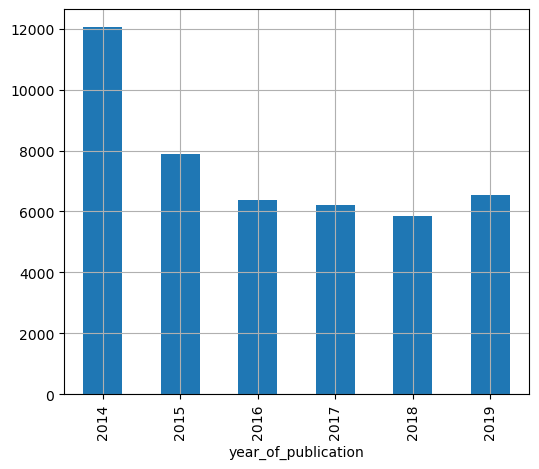

In [83]:
#Вычислим среднюю цену от этажа, на котором расположена квартира и построим график
apartment_to_price_mean = data.groupby('type_of_apartment_floor')['last_price'].mean();
apartment_to_price_mean.plot(x=apartment_to_price_mean.index, y=apartment_to_price_mean.values, kind='bar', grid=True, figsize=(6,5))
plt.show()

#Вычислим среднюю цену от количества комнат и построим график
rooms_to_price_mean = data.groupby('rooms')['last_price'].mean();
rooms_to_price_mean.plot(x=rooms_to_price_mean.index, y=rooms_to_price_mean.values, kind='bar', grid=True, figsize=(6,5))
plt.show()
print('Корреляция цены от количества комнат: ', data['last_price'].corr(data['rooms']))

#Вычислим среднюю цену от дня публикации и построим график
day_to_price_mean = data.groupby('publication_day_of_the_week')['last_price'].mean();
day_to_price_mean.plot(x=day_to_price_mean.index, y=day_to_price_mean.values, kind='bar', grid=True, figsize=(6,5))
plt.show()

#Вычислим среднюю цену от месяца публикации и построим график
month_to_price_mean = data.groupby('month_of_publication')['last_price'].mean();
month_to_price_mean.plot(x=month_to_price_mean.index, y=month_to_price_mean.values, kind='bar', grid=True, figsize=(6,5))
plt.show()

#Вычислим среднюю цену от года публикации и построим график
year_to_price_mean = data.groupby('year_of_publication')['last_price'].mean();
year_to_price_mean.plot(x=year_to_price_mean.index, y=year_to_price_mean.values, kind='bar', grid=True, figsize=(6,5))
plt.show()

Цена зависит от:
- общей площади
- жилой площади
- площади кухни
- количества комнат

Цена не зависит от:
- площади кухни
- этажа, на котором расположена квартира
- дней, месяц, года размещения

### 4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные найдём по имени в столбце **'locality_name'**.

<AxesSubplot:ylabel='locality_name'>

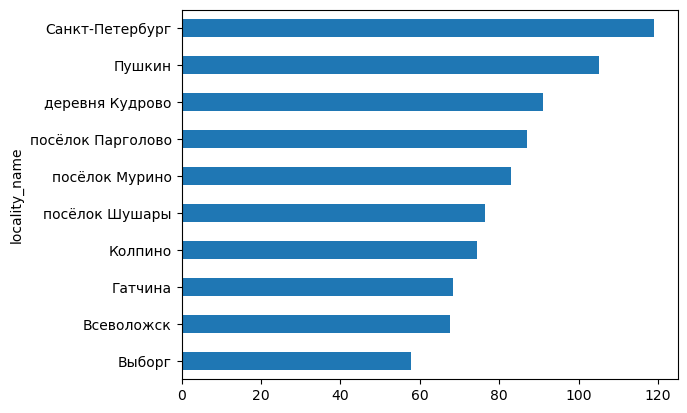

In [84]:
top_10 = data.pivot_table(index='locality_name', values=['last_price','total_area'] ,aggfunc=['sum','count']) # создание сводной таблицы с соотвествием названия населённого пункта и количества объявлений
top_10.columns=['last_price_sum','total_area_sum','last_price_count','total_area_count']                      # объявление столбцов
top_10.sort_values(by=['last_price_count'],ascending=False, inplace=True)                                     # отсортируем по цене
top_10 = top_10.iloc[:10]                                                                                     # выбор топ 10
top_10['average_price'] = top_10['last_price_sum']/top_10['total_area_sum']                                   # расчёт стоимости за 1 кв.м.
top_10.sort_values(by=['average_price'],ascending=True, inplace=True)                                         # отсортируем по средней цене
top_10['average_price'].plot(kind='barh')                                                                     # построение графика

- Населённые пункты с самой высокой средней стоимостью кв.м. это в Санкт-Петербурге - 120 тыс.
- Населённые пункты с самой низкой средней стоимостью кв.м. это в Выборге - 55 тыс.

### 5. Выделим квартиры в Санкт-Петербурге с помощью столбца **'locality_name'** и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города:

<AxesSubplot:xlabel='cityCenters_nearest_km'>

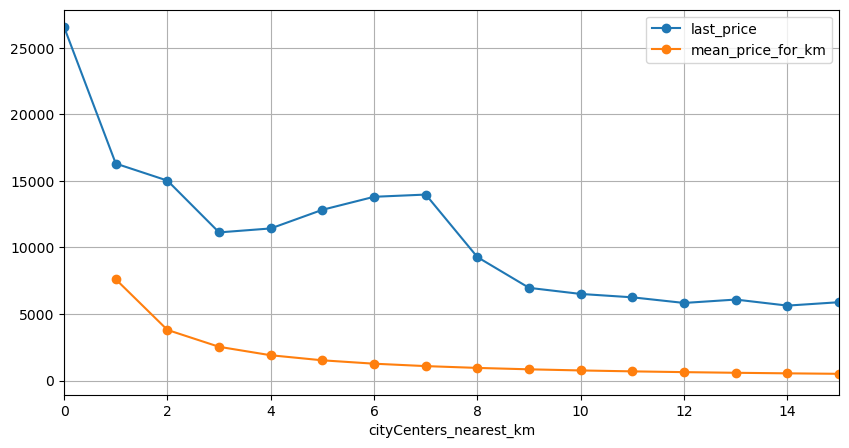

In [92]:
flat_spb = data.query('locality_name == "Санкт-Петербург"')                                                          # выбор квартир только в Санкт-Петербурге
flat_spb = flat_spb.dropna(subset = ['cityCenters_nearest'], inplace = False)                                        # удаление пропусков для дальнейшей работы
flat_spb['cityCenters_nearest_km'] = flat_spb.loc[:, 'cityCenters_nearest'] / 1000                                   # добавление столбца с км
flat_spb['cityCenters_nearest_km'] = flat_spb['cityCenters_nearest_km'].round()                                      # округление
flat_spb_mean_price_per_m = flat_spb['last_price'].mean()                                                            # средняя цена за кв.м
flat_spb['mean_price_for_km'] = flat_spb_mean_price_per_m / flat_spb['cityCenters_nearest_km']                       # средняя цена для каждого км
flat_spb.pivot_table(index='cityCenters_nearest_km', values=['last_price','mean_price_for_km']).plot(grid=True, 
                                                                                                     style='o-',
                                                                                                     xlim=(0,15),
                                                                                                     figsize=(10, 5))# построение графика

- Видим снижение средней стоимости недвижимости при удалённости от центра. Ярко выражен резкий рост стоимости в самом центре до 1 км. от центра. Видим более низкие цены на недвижимость на расстоянии от 8 км. до 30 км.
Поэтому стоимость объектов зависит от расстояния до центра города.



# Шаг 5. Напишем общий вывод:

В ходе работы была проведена предобработка данных - устранены некоторые пропуски, некорректные значения(выбросы). Оптимизированы названия населенных пунктов. Скорее всего, часть некорректных и пропущенных значений является ошибками ввода, часть - следствием невозможности обработать неполный адрес объекта. В дальнейшем при сборе данных стоит попытаться контролировать получаемые значения - не пропускать общую этажность дома, площадь кухни, жилую площадь. Из полученного датасета можно сделать вывод, что в центре Санкт-Петербурга квартиры дороже, чем на окраине или в пригородах. Студии и однушки по цене квадратного метра являются лидерами, но при этом продаются быстрее всего. К тому же и количество их предложений самое большое. Летом цены на квартиры несколько снижаются, а осенью и весной - растут. В целом по Ленинградской области существует однозначная зависимость между площадью квартиры и ее стоимостью, что вполне ожидаемо: чем больше площадь квартиры, тем она дороже. Присутствует связь между общей ценой и ценой 1 кв. м. Общие для Ленинградской области зависимости справедливы и для Санкт-Петербурга, но можно к тому же заметить, что высотными являются спальные кварталы на краю города, а центр равномерно мало и среднеэтажный.Для более точной оценки рыночной стоимости квартиры, на мой взгляд, следует учитывать и такие факторы, как расстояние до метро, материал дома, год постройки, наличие лифта, какой тип ремонта, электрическая или газовая плита, есть ли горячее водоснабжение или имеется газовая колонка. Стоимость квартиры при этом зависит от совокупности всех факторов не линейно - квартиры в доходных домах в центре ценятся за расположение, историческую и культурную ценность даже при необходимости огромных вложений в ремонт, а однушки на окраинах - за ликвидность и возможность получать доход от сдачи в аренду без особых затрат на ремонт.